In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from airsenal.framework.utils import *
from airsenal.framework.prediction_utils import fit_bonus_points

In [2]:
df = pd.read_sql(session.query(PlayerScore).statement, engine)
df.set_index("id", inplace=True)
df.head()

,player_team,opponent,points,goals,assists,bonus,conceded,minutes,player_id,result_id,...,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bps,influence,creativity,threat,ict_index
id,,,,,,,,,,,,,,,,,,,,,
1,SOU,BUR,0,0,0,0,0,0,415,4,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,SOU,LIV,0,0,0,0,0,0,415,16,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,SOU,BHA,0,0,0,0,0,0,415,23,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,SOU,MUN,0,0,0,0,0,0,415,31,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
5,SOU,SHU,0,0,0,0,0,0,415,44,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [3]:
players = pd.read_sql(session.query(Player).statement, engine)
players.set_index("player_id", inplace=True)
players.head()

,name
player_id,
1,Mesut Özil
2,Sokratis Papastathopoulos
3,David Luiz Moreira Marinho
4,Pierre-Emerick Aubameyang
5,Cédric Soares


## avg. bonus when playing more than 60, or 30-60 mins

In [4]:
df_more60, df_less60 = fit_bonus_points()

In [5]:
df_more60 = pd.merge(df_more60, players, how="left", left_index=True, right_index=True)
df_less60 = pd.merge(df_less60, players, how="left", left_index=True, right_index=True)

In [20]:
df_more60.sort_values(by="bonus", ascending=False).head(50)

,bonus,name
player_id,,
302,1.285714,Bruno Miguel Borges Fernandes
1024,1.153846,Philippe Coutinho
315,1.076923,Mason Greenwood
831,1.017241,Eden Hazard
4,0.974026,Pierre-Emerick Aubameyang
268,0.909091,Sergio Agüero
366,0.905660,Danny Ings
460,0.901408,Raúl Jiménez
388,0.900000,Harry Kane


In [7]:
df_less60.sort_values(by="bonus", ascending=False).head(15)

,bonus,name
player_id,,
4,0.600000,Pierre-Emerick Aubameyang
224,0.600000,Jamie Vardy
6,0.392857,Alexandre Lacazette
755,0.360000,Javier Hernández Balcázar
944,0.357143,Lucas Pérez
918,0.300000,Mikel Merino
506,0.300000,Callum Wilson
522,0.300000,Nacho Monreal
130,0.300000,James McArthur


## plot a player

In [8]:
idx = 4
get_player(idx).name

'Pierre-Emerick Aubameyang'

Text(0, 0.5, 'bps')

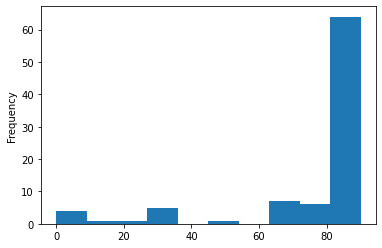

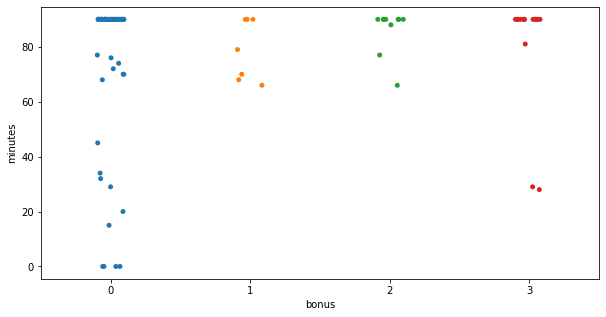

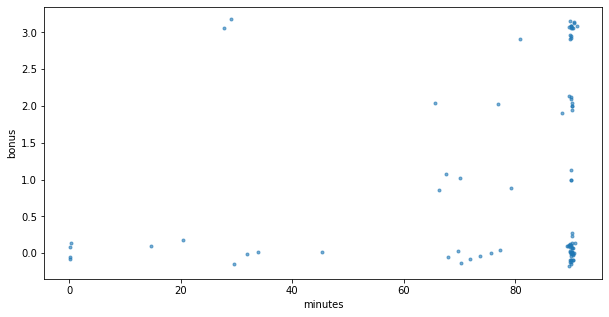

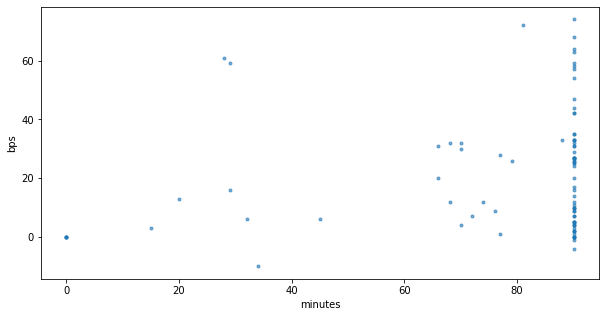

In [9]:
player = df[df.player_id == idx]

df[df.player_id == idx].minutes.plot.hist()

plt.figure(figsize=(10,5))
sns.stripplot(x="bonus", y="minutes", data=player)

plt.figure(figsize=(10, 5))
std = 0.1
plt.plot(player["minutes"] + np.random.normal(scale=3*std, size=len(player)),
         player["bonus"] + np.random.normal(scale=std, size=len(player)), '.', alpha=0.6)
plt.xlabel("minutes")
plt.ylabel("bonus")

plt.figure(figsize=(10,5))
plt.plot(player["minutes"], player["bps"], '.', alpha=0.6)
plt.xlabel("minutes")
plt.ylabel("bps")

## count of minutes played

(0.0, 500.0)

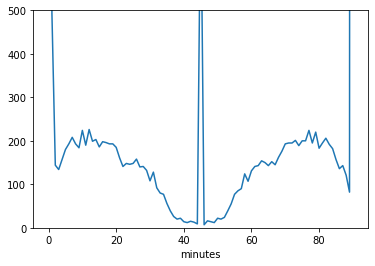

In [10]:
df.groupby("minutes").bonus.count().plot()
plt.ylim([0, 500])

## fit bonus vs mins across all players

[3.02380917e-05 6.92351888e-04 7.82810007e-04]


Text(0, 0.5, 'bonus')

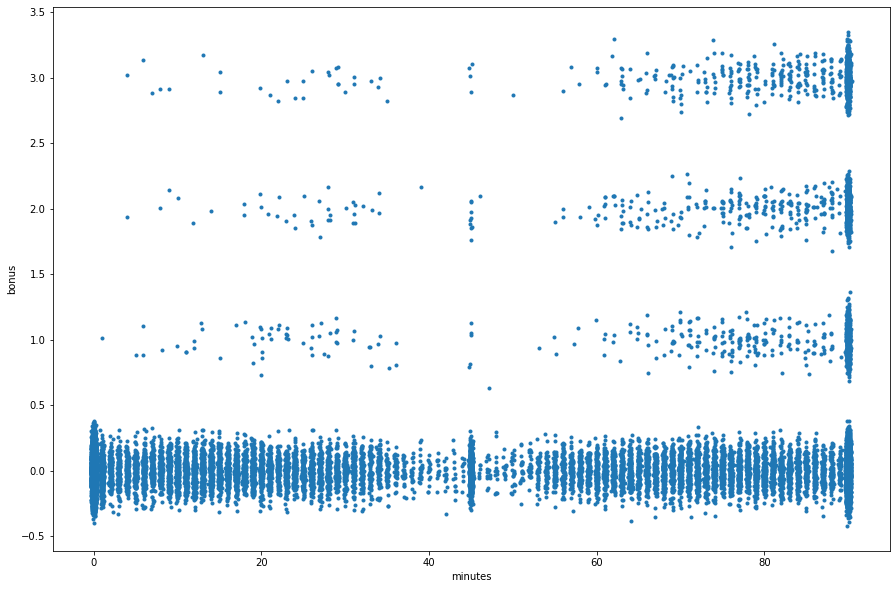

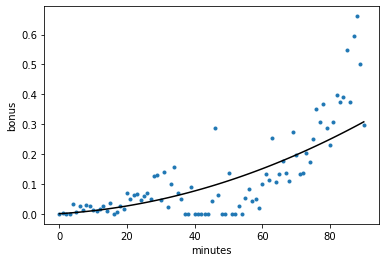

In [22]:
plt.figure(figsize=(15, 10))
std = 0.1
plt.plot(df["minutes"] + np.random.normal(scale=std, size=len(df)),
         df["bonus"] + np.random.normal(scale=std, size=len(df)), '.')
plt.xlabel("minutes")
plt.ylabel("bonus")

fit = np.polyfit(df["minutes"], df["bonus"], 2)
print(fit)
fit_vals = np.polyval(fit, np.arange(0,91))

plt.figure()

bonus_vs_mins = df.groupby("minutes").bonus.mean()
bonus_vs_mins.plot(linestyle='None', marker='.')
plt.plot(np.arange(0,91), fit_vals, 'k-')
plt.ylabel("bonus")

## scaling minutes fit for each player (player bonus "quality") - doesn't work well

In [12]:
df["exp_bonus"] = np.polyval(fit, df["minutes"])

unique_ids = df["player_id"].unique()
bonus_quality = pd.Series(index=unique_ids, dtype=float)

for idx in unique_ids:
    player_scores = df[df.player_id == idx]
    if sum(player_scores.minutes > 0) >= 10:
        player_fit = np.polyfit(player_scores["exp_bonus"],
                                player_scores["bonus"], 1)
        bonus_quality[idx] = player_fit[0]
    else:
        bonus_quality[idx] = 0

bonus_quality.sort_values(ascending=False)

/Users/jroberts/opt/anaconda3/envs/airsenalenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jroberts/opt/anaconda3/envs/airsenalenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jroberts/opt/anaconda3/envs/airsenalenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jroberts/opt/anaconda3/envs/airsenalenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jroberts/opt/anaconda3/envs/airsenalenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly

136     16.162799
1079     4.757001
315      4.562938
436      4.307706
256      4.170446
          ...    
1098    -0.333777
801     -0.442625
1077    -0.785866
892     -1.374572
302     -6.597365
Length: 1076, dtype: float64

## bps

[0.18327797 0.11135085]


Text(0, 0.5, 'bps')

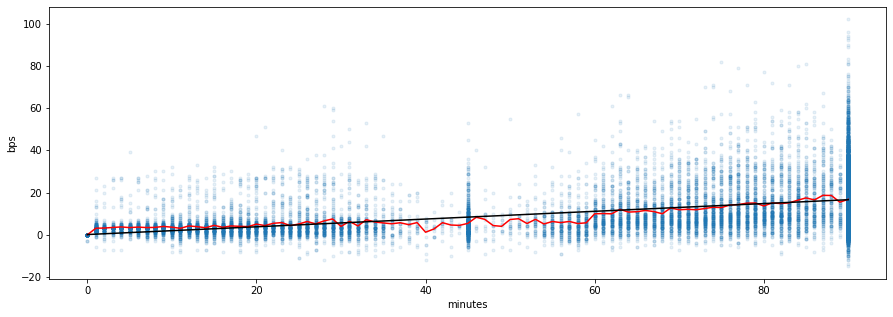

In [13]:
plt.figure(figsize=(15,5))
plt.plot(df["minutes"], df["bps"], '.', alpha=0.1)
df.groupby("minutes").bps.mean().plot(color='r')


fit = np.polyfit(df["minutes"], df["bps"], 1)
print(fit)
fit_vals = np.polyval(fit, np.arange(0,91))
plt.plot(np.arange(0,91), fit_vals, 'k-')
plt.ylabel("bps")

<AxesSubplot:xlabel='bonus', ylabel='bps'>

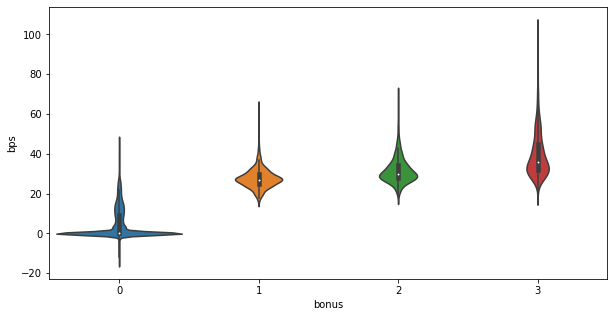

In [14]:
plt.figure(figsize=(10,5))
sns.violinplot(x="bonus", y="bps", data=df, width=0.9)

<AxesSubplot:xlabel='bps', ylabel='Density'>

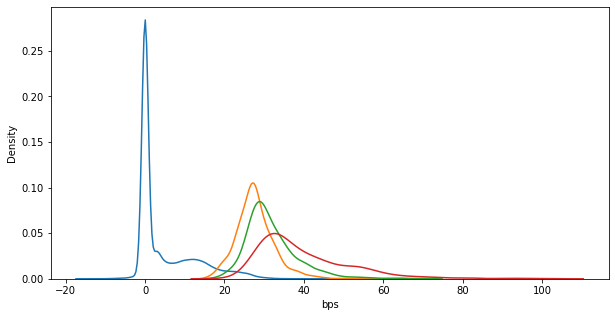

In [15]:
plt.figure(figsize=(10,5))
sns.kdeplot(df.loc[df.bonus==0, "bps"])
sns.kdeplot(df.loc[df.bonus==1, "bps"])
sns.kdeplot(df.loc[df.bonus==2, "bps"])
sns.kdeplot(df.loc[df.bonus==3, "bps"])

(-5.0, 40.0)

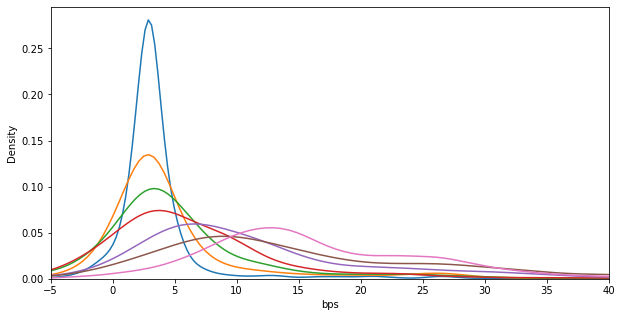

In [16]:
plt.figure(figsize=(10,5))
sns.kdeplot(df.loc[(df.minutes<=15) & (df.minutes >0), "bps"])
sns.kdeplot(df.loc[(df.minutes<=30) & (df.minutes >15), "bps"])
sns.kdeplot(df.loc[(df.minutes<=45) & (df.minutes >30), "bps"])
sns.kdeplot(df.loc[(df.minutes<=60) & (df.minutes >45), "bps"])
sns.kdeplot(df.loc[(df.minutes<=75) & (df.minutes >60), "bps"])
sns.kdeplot(df.loc[(df.minutes<90) & (df.minutes >75), "bps"])
sns.kdeplot(df.loc[(df.minutes==90), "bps"])

plt.xlim([-5, 40])

In [17]:
df[df.minutes>0].groupby("player_id").saves.mean().sort_values(ascending=False).head(20)

player_id
171     7.500000
433     4.500000
717     4.333333
1053    4.142857
613     4.000000
859     3.827586
12      3.777778
803     3.710526
554     3.666667
656     3.638889
431     3.534653
8       3.516129
56      3.500000
657     3.500000
325     3.500000
483     3.459459
482     3.447368
696     3.428571
393     3.318182
553     3.250000
Name: saves, dtype: float64